### 과제
1. 상관관계, heatmap
2. 정규화후 학습
3. cost 값 hist plot 차트로
4. 검정
- confusion matrix, heatmap
- 정확도
- f1 score

In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


### 1. 상관관계 Heatmap

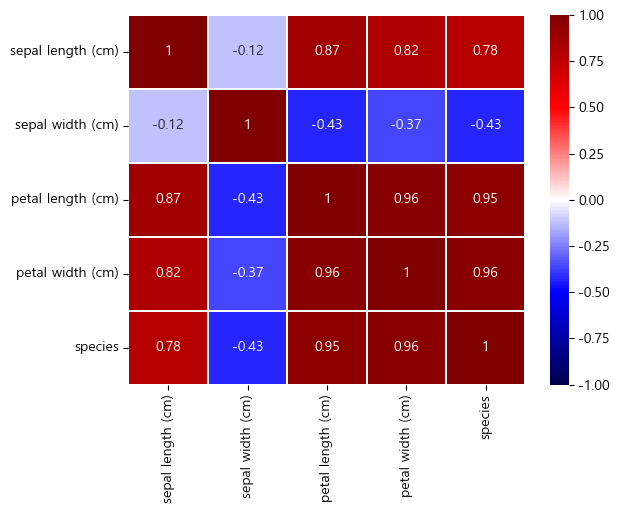

In [7]:
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [8]:
x_data = df.iloc[:,:-1].values
y_onehot = pd.get_dummies(df['species'])
y_data = y_onehot.values

### 2. 정규화

In [9]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

In [10]:
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_data)

In [11]:
model = Sequential()
model.add_module('nn1', Linear(4,3)) # (특성갯수, 라벨 갯수) w: 특성갯수 x 라벨 갯수, b: 라벨 갯수
model.add_module('softmax', Softmax(dim=1)) # 활성함수
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [12]:
hist=[]
for epoch in range(2000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Softmax(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print(epoch, cost.item())
    hist.append(cost.item())

0 1.1283111572265625
1 1.1250345706939697
2 1.1218199729919434
3 1.1186703443527222
4 1.115587592124939
5 1.1125737428665161
6 1.10962975025177
7 1.1067558526992798
8 1.1039519309997559
9 1.1012165546417236
10 1.098547101020813
11 1.095940113067627
12 1.093390941619873
13 1.0908935070037842
14 1.0884416103363037
15 1.0860278606414795
16 1.0836457014083862
17 1.0812885761260986
18 1.078950047492981
19 1.0766247510910034
20 1.0743074417114258
21 1.0719940662384033
22 1.0696799755096436
23 1.067361831665039
24 1.065036654472351
25 1.0627009868621826
26 1.0603528022766113
27 1.057990550994873
28 1.0556124448776245
29 1.0532177686691284
30 1.0508065223693848
31 1.0483784675598145
32 1.045934796333313
33 1.043475866317749
34 1.0410033464431763
35 1.0385185480117798
36 1.036023497581482
37 1.0335198640823364
38 1.0310097932815552
39 1.0284955501556396
40 1.0259788036346436
41 1.0234622955322266
42 1.0209476947784424
43 1.0184372663497925
44 1.0159331560134888
45 1.013437032699585
46 1.0109511

405 0.7499405145645142
406 0.7496814131736755
407 0.7494229078292847
408 0.749165415763855
409 0.748908519744873
410 0.748652458190918
411 0.7483972311019897
412 0.7481427788734436
413 0.74788898229599
414 0.747636079788208
415 0.7473838329315186
416 0.7471323609352112
417 0.7468817830085754
418 0.7466317415237427
419 0.746382474899292
420 0.7461340427398682
421 0.7458862662315369
422 0.7456392645835876
423 0.7453929781913757
424 0.7451474070549011
425 0.7449025511741638
426 0.7446584105491638
427 0.7444149255752563
428 0.7441721558570862
429 0.7439301609992981
430 0.7436887621879578
431 0.7434481382369995
432 0.743208110332489
433 0.7429688572883606
434 0.7427302598953247
435 0.7424924373626709
436 0.7422551512718201
437 0.742018461227417
438 0.7417826056480408
439 0.7415473461151123
440 0.7413127422332764
441 0.7410788536071777
442 0.7408455610275269
443 0.7406129240989685
444 0.7403808832168579
445 0.7401495575904846
446 0.7399188876152039
447 0.7396888136863708
448 0.73945933580398

800 0.6833223700523376
801 0.6832088232040405
802 0.683095395565033
803 0.6829822063446045
804 0.6828691959381104
805 0.6827563047409058
806 0.682643711566925
807 0.6825311183929443
808 0.6824188232421875
809 0.682306706905365
810 0.682194709777832
811 0.6820829510688782
812 0.6819713115692139
813 0.6818599104881287
814 0.681748628616333
815 0.6816375851631165
816 0.6815267205238342
817 0.6814160346984863
818 0.6813054084777832
819 0.6811950206756592
820 0.6810848116874695
821 0.6809747219085693
822 0.6808648705482483
823 0.6807551980018616
824 0.6806456446647644
825 0.6805363297462463
826 0.6804271340370178
827 0.6803181171417236
828 0.6802093386650085
829 0.680100679397583
830 0.679992139339447
831 0.6798837780952454
832 0.679775595664978
833 0.679667592048645
834 0.6795597672462463
835 0.6794521808624268
836 0.679344654083252
837 0.6792372465133667
838 0.6791301369667053
839 0.6790232062339783
840 0.678916335105896
841 0.678809642791748
842 0.6787031292915344
843 0.6785968542098999


1186 0.6499128937721252
1187 0.6498475670814514
1188 0.6497822403907776
1189 0.6497170329093933
1190 0.6496518850326538
1191 0.6495869159698486
1192 0.6495219469070435
1193 0.6494570970535278
1194 0.649392306804657
1195 0.6493275761604309
1196 0.6492629647254944
1197 0.6491985321044922
1198 0.6491339802742004
1199 0.6490696668624878
1200 0.6490053534507751
1201 0.648941159248352
1202 0.6488770842552185
1203 0.6488130688667297
1204 0.6487491130828857
1205 0.6486852169036865
1206 0.6486214995384216
1207 0.6485576629638672
1208 0.6484941840171814
1209 0.648430585861206
1210 0.648367166519165
1211 0.6483038067817688
1212 0.6482404470443726
1213 0.6481772661209106
1214 0.6481141448020935
1215 0.6480510830879211
1216 0.6479882001876831
1217 0.6479252576828003
1218 0.647862434387207
1219 0.6477997303009033
1220 0.6477371454238892
1221 0.647674560546875
1222 0.6476120948791504
1223 0.6475496888160706
1224 0.6474874019622803
1225 0.64742511510849
1226 0.6473629474639893
1227 0.6473008990287781


1894 0.6185339093208313
1895 0.6185041069984436
1896 0.6184743046760559
1897 0.6184446215629578
1898 0.6184149384498596
1899 0.6183852553367615
1900 0.6183556318283081
1901 0.6183260083198547
1902 0.6182963848114014
1903 0.6182668209075928
1904 0.6182373762130737
1905 0.6182078719139099
1906 0.6181783676147461
1907 0.6181488633155823
1908 0.618119478225708
1909 0.618090033531189
1910 0.6180607080459595
1911 0.6180314421653748
1912 0.6180021166801453
1913 0.6179727911949158
1914 0.617943525314331
1915 0.6179142594337463
1916 0.6178850531578064
1917 0.6178558468818665
1918 0.6178267598152161
1919 0.6177976727485657
1920 0.6177685260772705
1921 0.6177394986152649
1922 0.6177104711532593
1923 0.6176814436912537
1924 0.617652416229248
1925 0.6176234483718872
1926 0.6175944805145264
1927 0.6175656318664551
1928 0.617536723613739
1929 0.6175078749656677
1930 0.6174790263175964
1931 0.6174501776695251
1932 0.6174214482307434
1933 0.6173926591873169
1934 0.6173639297485352
1935 0.61733531951904

### 3. cost 값 hist plot 차트로

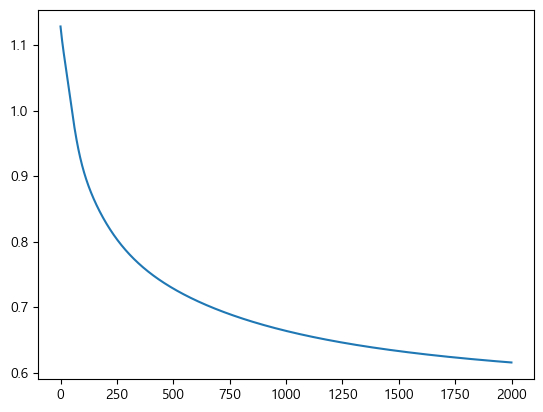

In [13]:
plt.plot(hist)
plt.show()

In [14]:
p = model.forward(x)

In [15]:
y_pred = p.argmax(dim=1).numpy()
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [16]:
y_true = df['species'].values
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 4. 검정
- confusion matrix, heatmap

In [17]:
con_mat = confusion_matrix(y_true, y_pred)

In [18]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
y_labels = iris['target_names']
x_labels = ['pred_setosa', 'pred_versicolor', 'pred_virginica']

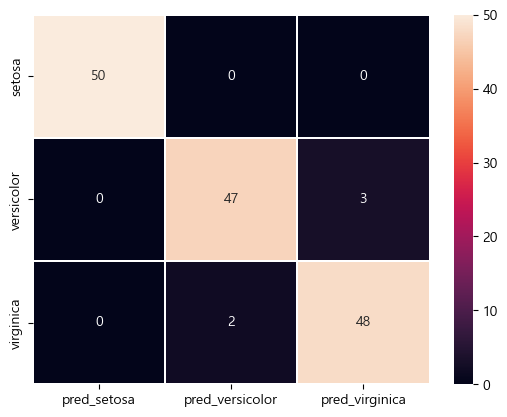

In [20]:
sb.heatmap( con_mat, annot=True, fmt='d', linewidths=0.2, 
           yticklabels=y_labels, xticklabels=x_labels )
plt.show()

- 정확도

In [21]:
accuracy_score(y_true, y_pred)

0.9666666666666667

- f1 score

In [22]:
f1_score(y_true, y_pred, average='macro')

0.9666633329999667